# Lab. work №3
## Clusterization

[Link to Kaggle competition](https://www.kaggle.com/c/titanic/data)

Connect libraries and adjust the parameters for displaying the number of rows and columns of dataframes. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

## Read data from the disk and view the size of the dataframes 

In [2]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")

print("Test shape:", data_test.shape)
print("Train shape:", data_train.shape)

Test shape: (418, 11)
Train shape: (891, 12)


## Train data samples

In [3]:
data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S


## Types of features

In [4]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
numerical_features = [x for x in list(data_train.select_dtypes([np.number]).columns)]
categorical_features = [x for x in list(data_train.select_dtypes([np.object]).columns)]

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## Determining the percentage of missing data 

In [6]:
def missing_values_presents(missing):
    for name, val in missing.items():
        if val != 0:
            return True
    return False

def missing_bar_plot(data):
    # find all nulls in every feature
    missing_data = data.isnull().sum()
    
    # remain only those columns in which there is no data 
    missing_data = missing_data[missing_data > 0]

    # sort
    missing_data.sort_values(inplace=True)
    
    # cast integers to floats
    missing_data = pd.to_numeric(missing_data, downcast="float")

    # check if there is any empty data
    if not missing_values_presents(missing_data):
        print("There is no missing data!")
        return
    
    rows = data.shape[0]
    
    # calculate the percentage of missing data in relation to the total amount of data
    for name, val in missing_data.items():
        percent = missing_data[name]/rows
        missing_data[name] = percent
        
    missing_data.plot.bar()
    

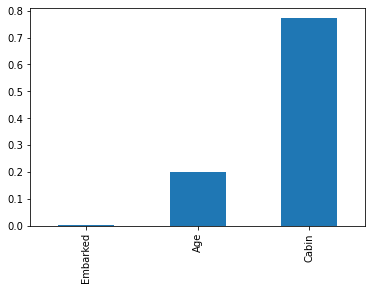

In [7]:
missing_bar_plot(data_train)

## Check dublicates

In [8]:
print(f"Train dataset: {data_train[data_train.duplicated()]}\n")

print(f"Test dataset: {data_test[data_test.duplicated()]}")

Train dataset: Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Test dataset: Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## Number of variations of categorical data 

In [9]:
data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [10]:
data_test.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64

## Data distributions

 ### Feature distribution `Age`

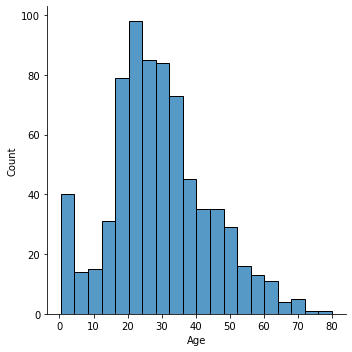

In [11]:
sns.displot(data_train["Age"], kde=False)

 ### Feature distribution `Pclass` та `Fare` (ticket class and rate)

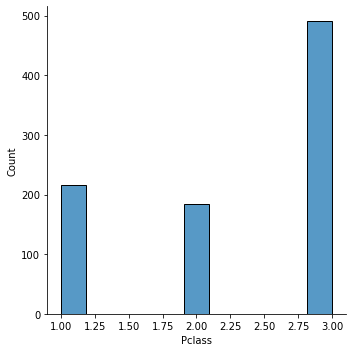

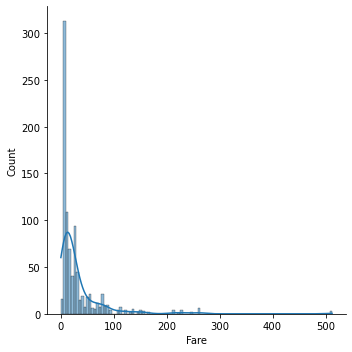

In [12]:
sns.displot(data_train["Pclass"], kde=False)
sns.displot(data_train["Fare"], kde=True)

 ### Feature distribution `SibSp` (number of siblings  / married couple on the board)

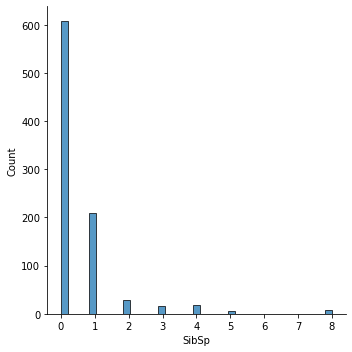

In [13]:
sns.displot(data_train["SibSp"], kde=False)

 ### Feature distribution `Parch` (number of parents / children on board for each person)

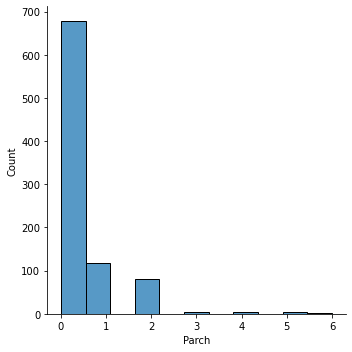

In [14]:
sns.displot(data_train["Parch"], kde=False)

### Feature distribution `Embarked` (The place where the passenger boarded)
* 2 --> S
* 1 --> Q
* 0 --> C

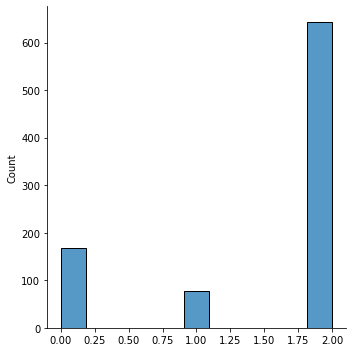

In [15]:
embarked_temp = data_train["Embarked"].copy().astype("category").cat.codes
sns.displot(embarked_temp[embarked_temp >= 0], kde=False)

## Determine outliers

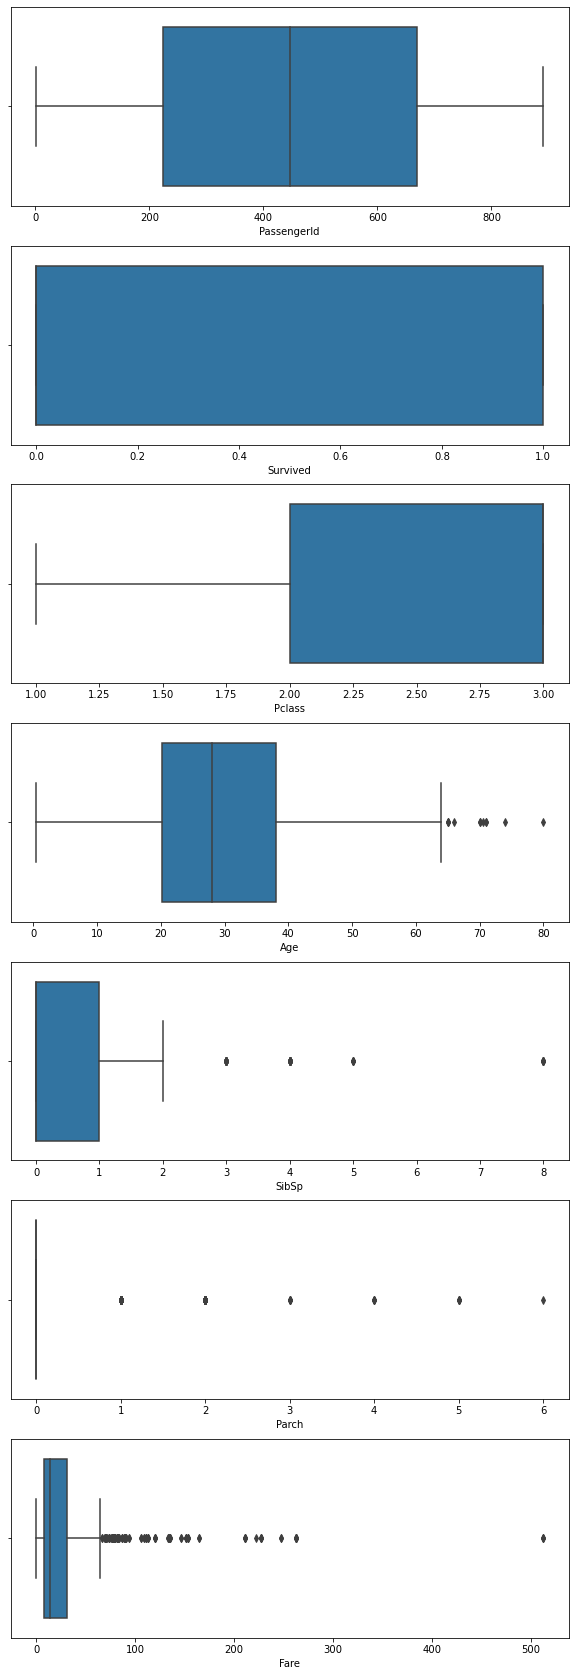

In [16]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10,30)
for i, col in enumerate(numerical_features):
    sns.boxplot(x=data_train[col], ax=axes[i])
plt.show()

## Correlation matrix

As we can see, we can discard, for example, the feature `Pclass`, because it has a strong correlation with `Fare` 

<AxesSubplot:>

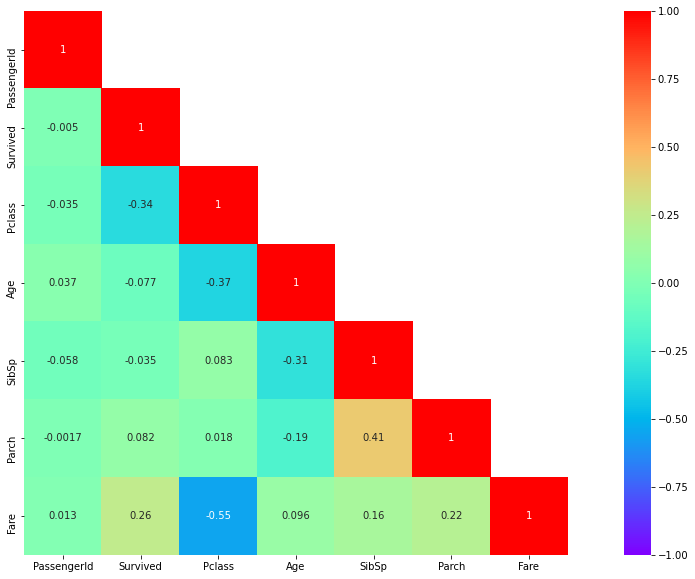

In [17]:
corrMatt = data_train[numerical_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="rainbow", mask=mask, vmax=1, vmin=-1, square=True, annot=True)

## Data preparation before clusterization

In [18]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv") 

We will reject next features: 1. `PassengerId` (as it doesn't carry any sense) 2. `Ticket` (as the data are not organized in any way, and it is impossible to allocate sense from them) 3. `Cabin` (as there is much data with empty cells) 4. `Survived` (as for clustering to us this feature is not required) 

In [19]:
prepared_data_test = data_test
prepared_data_train = data_train

prepared_data_train.drop(columns={"Cabin","Ticket","PassengerId", "Survived"},inplace=True)
prepared_data_test.drop(columns={"Cabin","Ticket","PassengerId"},inplace=True)

Remain the next features

In [20]:
categorical_features = ["Name", "Embarked", "Sex", "SibSp", "Parch"]
numerical_features = ["Age", "Fare"]

In [21]:
num_cat_feat =  numerical_features + categorical_features

## Function that select prefix from passenger names 
Because the names have different prefixes such as Mr, Miss, Sir, Capt: 
```
...
Slabenoff, Mr. Petco
Aubart, Mme. Leontine Pauline
Ridsdale, Miss. Lucy
Hewlett, Mrs. (Mary D Kingcome)	
Gilnagh, Miss. Katherine "Katie"
...
```

We can additionally take and make new features based on names by selecting prefixes. 

Then, some prefixes (Mr, Mrs) will have a high correlation with the gender of the person, however we will get additional information about the different "layers" of communities on the ship and can single out some ship staff. 


In [22]:
def extract_prefixes(data):
    # prefixes dictionary
    prefixes = {
    "Capt": "Сrew",
    "Col": "Сrew",
    "Major": "Сrew",
    "Jonkheer": "VIP",
    "Don": "VIP",
    "Sir" : "VIP",
    "Dr": "Сrew",
    "Rev": "Сrew",
    "the Countess":"VIP",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "VIP"
    }
    
    # for every name
    for i in range(len(data)):
        cur_name = data[i]
        
        # check if any prefix fits in the name
        for prefix in prefixes.keys():
            if prefix in cur_name:
                cur_name = prefixes[prefix]
                break
                
        data[i] = cur_name
        
    return data  

In [23]:
prepared_data_train["Name"] = extract_prefixes(prepared_data_train["Name"])
prepared_data_test["Name"] = extract_prefixes(prepared_data_test["Name"])

# get column with prefixes
prepared_data_test.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
216,3,Miss,female,NaN,0,0,7.8792,Q
288,3,Mr,male,NaN,0,0,7.2292,C
210,3,Mr,male,32.0,0,0,22.5250,S
126,3,Mr,male,22.0,0,0,7.7958,S
368,1,Mr,female,45.0,0,1,59.4000,C


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(
        steps = [
            # according to the plot it is logical to fill the missing data
            # with most_frequent values
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler())
        ]
)

categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

def transform(data):
    prepr.fit(data)
    return prepr.transform(data)

In [25]:
# combine data so that there were no problems with categorical data
joined_test_train = pd.concat([prepared_data_train, prepared_data_test])

joined_test_train = transform(joined_test_train)

train_x = joined_test_train[:prepared_data_train.shape[0]]
test_x = joined_test_train[prepared_data_train.shape[0]:]

print(f"trainX:",train_x.shape)
print(f"testX:",test_x.shape)

trainX: (891, 29)
testX: (418, 29)


## Dimension folding using t-SNE

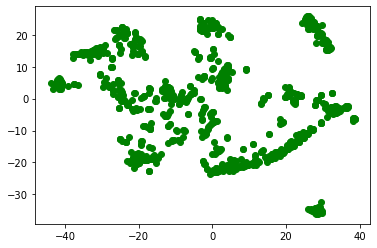

In [26]:
def plot_cluster(data, labels):
    plt.scatter(data[:,0],data[:,1], c=labels, cmap='winter')

# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE

perplexity_tsne = 30

tsne = TSNE(perplexity=perplexity_tsne, n_iter=1000, random_state=30)

train_scaled = tsne.fit_transform(train_x)
all_scaled = tsne.fit_transform(joined_test_train)

plot_cluster(train_scaled, "green")

## K-means algorithm

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

def kmeans(folded_repr, clusters, return_preds=False):
    kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=1000,
    n_clusters=clusters,
    random_state=None, verbose=0)
    labels = kmeans.fit(folded_repr).labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return kmeans.fit_predict(folded_repr)

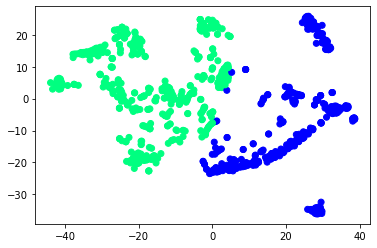

In [28]:
predictions = kmeans(train_scaled,2, True)
data_train["pred"] = predictions

In [29]:
### Overview of the values by which the algorithm assigned certain records to a particular group 

In [30]:
data_train[data_train["pred"] == 1].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,pred
126,3,Mr,male,NaN,0,0,7.7500,Q,1
514,3,Сrew,male,24.0,0,0,7.4958,S,1
492,1,Mr,male,55.0,0,0,30.5000,S,1
197,3,Mr,male,42.0,0,1,8.4042,S,1
805,3,Mr,male,31.0,0,0,7.7750,S,1
630,1,Mr,male,80.0,0,0,30.0000,S,1
189,3,Mr,male,36.0,0,0,7.8958,S,1
804,3,Mr,male,27.0,0,0,6.9750,S,1
626,2,Сrew,male,57.0,0,0,12.3500,Q,1
688,3,Mr,male,18.0,0,0,7.7958,S,1


In [31]:
data_train[data_train["pred"] == 0].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,pred
750,2,Miss,female,4.0,1,1,23.0000,S,0
358,3,Miss,female,NaN,0,0,7.8792,Q,0
182,3,Master,male,9.0,4,2,31.3875,S,0
347,3,Mr,female,NaN,1,0,16.1000,S,0
786,3,Miss,female,18.0,0,0,7.4958,S,0
889,1,Mr,male,26.0,0,0,30.0000,C,0
680,3,Miss,female,NaN,0,0,8.1375,Q,0
100,3,Miss,female,28.0,0,0,7.8958,S,0
617,3,Mr,female,26.0,1,0,16.1000,S,0
236,2,Mr,male,44.0,1,0,26.0000,S,0


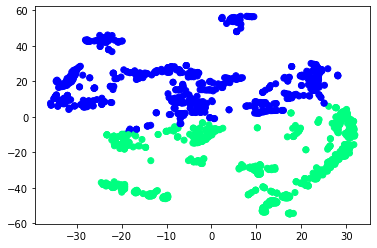

In [32]:
kmeans(all_scaled,2)

## DBSCAN algorithm

In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN

def dbscan(folded_repr, eps_, return_preds=False):
    # eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    db = DBSCAN(eps=eps_, min_samples=2)
    db.fit(folded_repr)
    labels = db.labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return db.fit_predict(folded_repr)

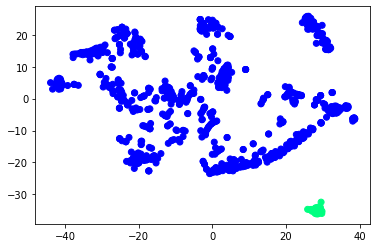

In [34]:
predictions = dbscan(train_scaled,18, True)
data_train["pred"] = predictions

In [35]:
data_train[data_train["pred"] == 1].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,pred
301,3,Mr,male,NaN,2,0,23.2500,Q,1
825,3,Mr,male,NaN,0,0,6.9500,Q,1
718,3,Mr,male,NaN,0,0,15.5000,Q,1
196,3,Mr,male,NaN,0,0,7.7500,Q,1
517,3,Mr,male,NaN,0,0,24.1500,Q,1
260,3,Mr,male,NaN,0,0,7.7500,Q,1
613,3,Mr,male,NaN,0,0,7.7500,Q,1
703,3,Mr,male,25.0,0,0,7.7417,Q,1
560,3,Mr,male,NaN,0,0,7.7500,Q,1
776,3,Mr,male,NaN,0,0,7.7500,Q,1


In [36]:
data_train[data_train["pred"] == 0].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,pred
147,3,Miss,female,9.0,2,2,34.3750,S,0
875,3,Miss,female,15.0,0,0,7.2250,C,0
214,3,Mr,male,NaN,1,0,7.7500,Q,0
449,1,Сrew,male,52.0,0,0,30.5000,S,0
775,3,Mr,male,18.0,0,0,7.7500,S,0
733,2,Mr,male,23.0,0,0,13.0000,S,0
186,3,Mr,female,NaN,1,0,15.5000,Q,0
38,3,Miss,female,18.0,2,0,18.0000,S,0
151,1,Mr,female,22.0,1,0,66.6000,S,0
780,3,Miss,female,13.0,0,0,7.2292,C,0


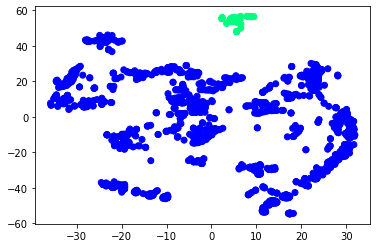

In [37]:
dbscan(all_scaled,15)

## Agglomerative clustering (bottom-up)

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering

def agglomerative(folded_repr, link, clusters, return_preds=False):
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage=link)
    cluster.fit(folded_repr)
    labels = cluster.labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return cluster.fit_predict(folded_repr)
    

`Average` - uses the average of the distances of each observation of the two sets

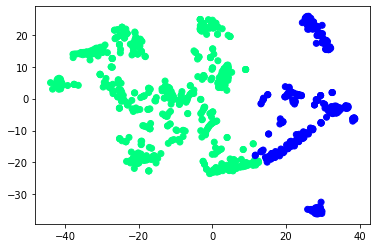

In [39]:
agglomerative(train_scaled, "average", 2)

`Сomplete` - uses the length between the two farthest records in the cluster 

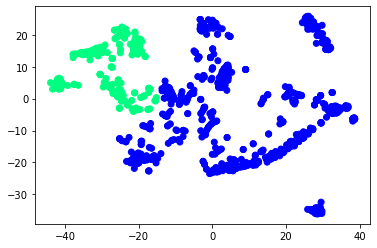

In [40]:
agglomerative(train_scaled, "complete",2)